In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/denis/student_performance_data.csv')
df.head()

,StudentID,Age,StudyHoursPerWeek,AttendanceRate,GPA,probability
0,1,24,37,90.75,3.47,1
1,2,22,37,74.90,2.32,0
2,3,22,10,53.36,2.38,0
3,4,24,10,70.26,3.46,1
4,5,18,19,74.87,2.31,1


In [5]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
df=pd.read_csv('/content/drive/MyDrive/denis/student_performance_data.csv')
x=df.drop('probability', axis=1)
y=df['probability']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [6]:
geo=DecisionTreeClassifier(criterion='entropy',random_state=42)
geo.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [7]:
y_pred=geo.predict(x_test)
print(y_pred)

[1 1 1 0 1 0 1 0 0 1 0 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 0 0 1 1 1
 1 1 1 0 0 1 0 0 0 0 1 1 0 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 0 1 0 1 1 0 1 0
 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 1 0 1 0 1 1 0 1]


In [10]:
Accurancy=accuracy_score(y_test,y_pred)
print('Accurancy:',Accurancy)
print(f"Accuracy: {Accurancy:.2f}")
report = classification_report(y_test,y_pred)
print("Classification Report:")
print(report)
conf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accurancy: 0.5
Accuracy: 0.50
Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.43      0.44        47
           1       0.53      0.57      0.55        53

    accuracy                           0.50       100
   macro avg       0.50      0.50      0.49       100
weighted avg       0.50      0.50      0.50       100

Confusion Matrix:
[[20 27]
 [23 30]]


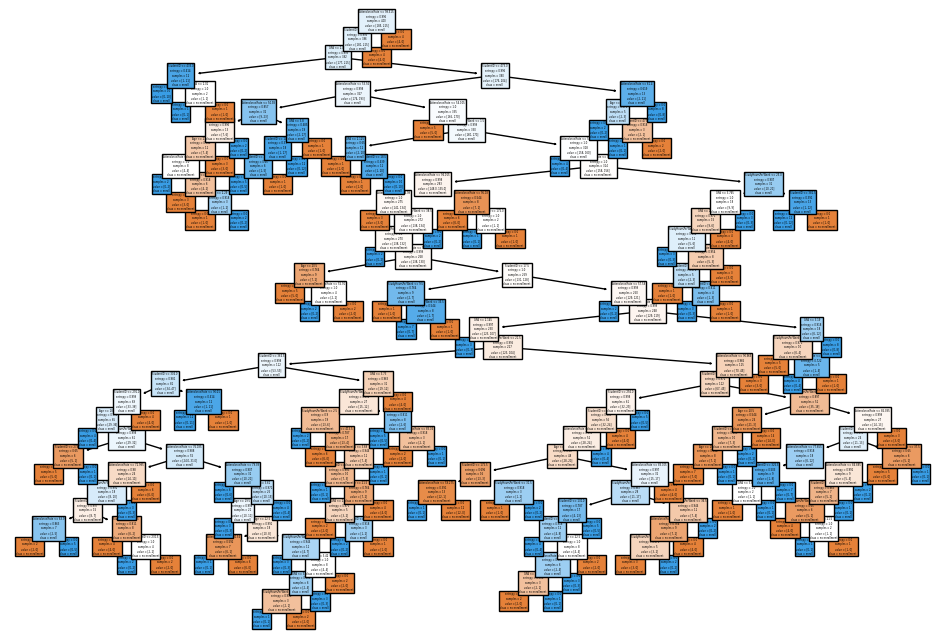

In [14]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plot_tree(geo,filled=True,feature_names=x.columns,class_names=['no enrollment','enroll'])
plt.show()